In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

# 데이터 전처리

In [3]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [4]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [5]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [6]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [7]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [8]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [40]:
train.head()
train.columns

Index(['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num', '년',
       '월', 'distributor_(주)NEW', 'distributor_(주)마운틴픽쳐스',
       'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트', 'distributor_기타',
       'distributor_롯데엔터테인먼트', 'genre_SF', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가'],
      dtype='object')

# 모델 생성 및 예측(과제부분)

In [12]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [19]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
}

In [20]:
model=RandomForestRegressor()

In [21]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [22]:
grid_search = grid_search.fit(train_x, train_y)

In [24]:
print(-grid_search.best_score_)
print(grid_search.best_params_)

2134383434927.3477
{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}


In [27]:
best_rf = grid_search.best_estimator_
best_rf.fit(train_x, train_y)

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=200)

from sklearn.metrics import r2_score, mean_squared_error

best_pred = best_rf.predict(test)
print('R squared: %.3f' % r2_score(test, best_pred))
print('MSE: %.3f' % mean_squared_error(test, best_pred))

In [34]:
best_pred = best_rf.predict(test)

# 제출

In [35]:
submission = pd.read_csv('submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [36]:
submission['box_off_num'] = best_pred

In [37]:
submission

,title,box_off_num
0,용서는 없다,1.688647e+06
1,아빠가 여자를 좋아해,1.836810e+06
2,하모니,1.807037e+06
3,의형제,2.377610e+06
4,평행 이론,1.391981e+06
...,...,...
238,해에게서 소년에게,1.139146e+05
239,울보 권투부,6.903181e+04
240,어떤살인,4.063921e+05
241,말하지 못한 비밀,8.491467e+04


In [38]:
submission.to_csv('베이스라인.csv',index = False)

# 제출 점수(과제부분)

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


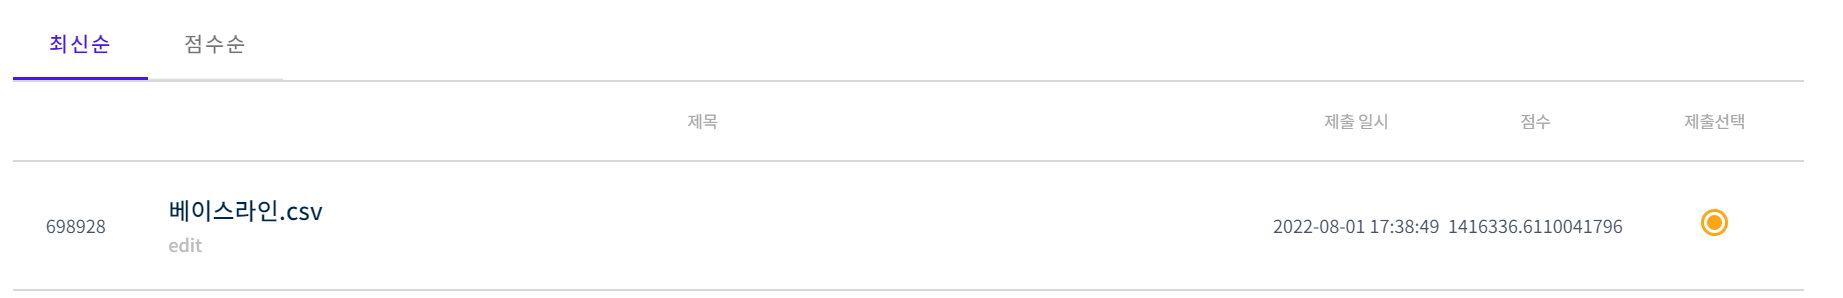

In [3]:
!pip install IPython
from IPython.display import Image
Image("dacon_submit.png")